# 02 Data Processing

In this notebook, we load the raw data, process it according to specifications in the feature dictionary, and then save the processed version for further analysis. Key steps include:


In [1]:
%load_ext autoreload
%autoreload 2


In [3]:
# Imports
import sys
import os

from data_loading import load_data
from data_exploration import print_dataset_info, analyze_features_dict, check_missing_values
from data_processing import preprocess_features
from utils import correlation_matrix, mutual_information, point_biserial_correlation, feature_target_correlation

#### Data loading and (standard) processing

In [4]:
# Load the raw data (~1.5 minutes)
data_path = "../data"
x_train, x_test, y_train, train_ids, test_ids, feature_names, feature_dict = load_data(data_path)

Loading raw data...
Data loaded.


In [5]:
# Process the features (~1 minute)
x_train, x_test, feature_names, feature_dict = preprocess_features(x_train, y_train, x_test, feature_names, feature_dict, save_data=True)

Preprocessing data...
Data preprocessed and saved in ../data/preprocessed/std.


#### Informations about the dataset and dictionnary of features

In [6]:
# Print information about the dataset
print_dataset_info(x_train, y_train, x_test, feature_dict)

Dataset Information

Training Data
328135 samples
With labels: [0 1]
0: 91.17%
and 1: 8.83%

Test Data
109379 samples

Features
440 features:
The first column of the datasets is the "sample id" and is not in the dictionary



In [7]:
# Print informations about the features
analyze_features_dict(feature_dict)

Features Dict Information

Total number of features: 440

Number of categorical features: 399
Number of numerical features: 41

Number of features to be discarded: 0

Categorical feature subtypes:
  undefined: 399

Numerical feature subtypes:
  undefined: 41

Encoding types:
  ordinal: 30
  binary: 74
  one-hot: 285
  past_30_days: 2
  frequency: 8


#### Checking missing values, feature-feature correlation and feature-target correlation

In [8]:
# Check missing values
check_missing_values(x_train, x_test, feature_names, p=0.9)

Overall missing values:
 - x_train missing values: 0 (0.00%)
 - x_test missing values: 0 (0.00%)
 - Combined missing values: 0

Features with more than 90.00% missing values:
Total features with more than 90.00% missing values: 0
Total features with missing values: 0


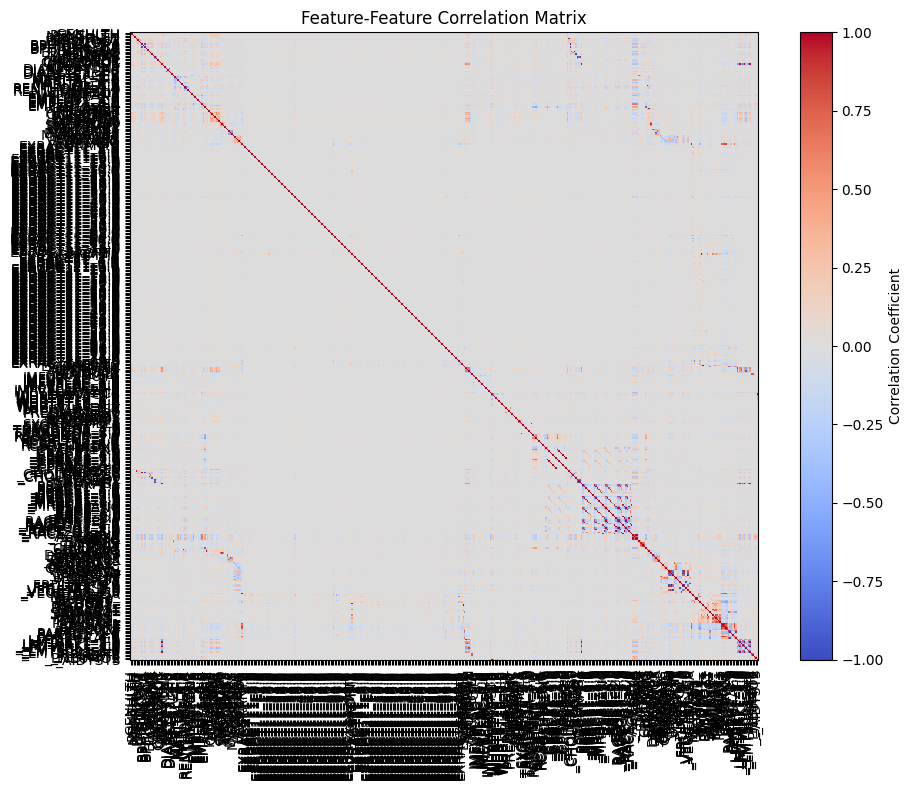

In [9]:
# Check feature-feature correlation in raw data
ff_correlation_matrix = correlation_matrix(x_train, feature_names, display_plot=True)

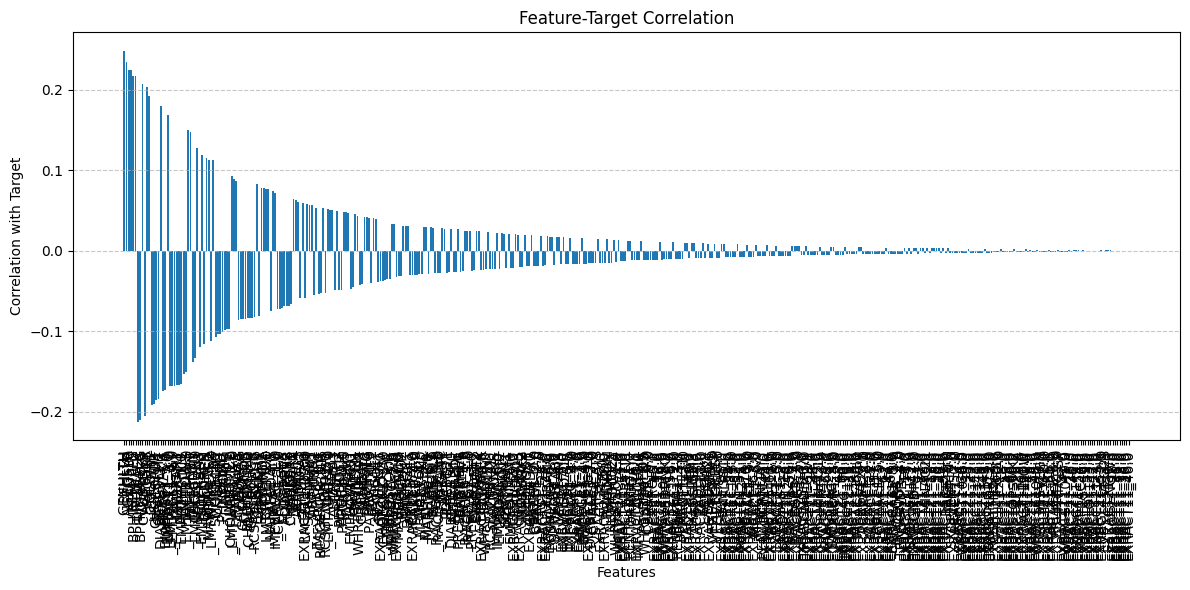

In [10]:
# Check feature-target correlation in raw data
ft_correlation_matrix = feature_target_correlation(x_train, y_train, feature_names, display_plot=True)

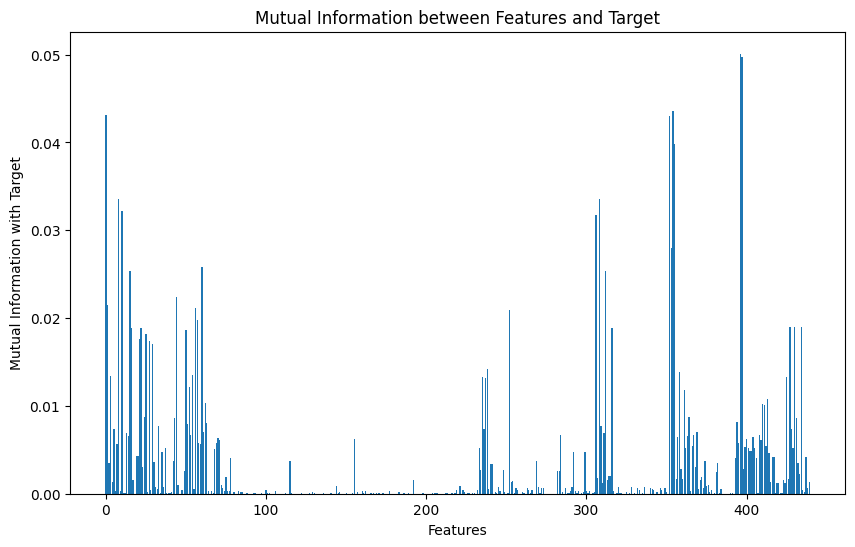

In [10]:
# Check mutual information between features and target
mi = mutual_information(x_train, y_train, display_plot=True)

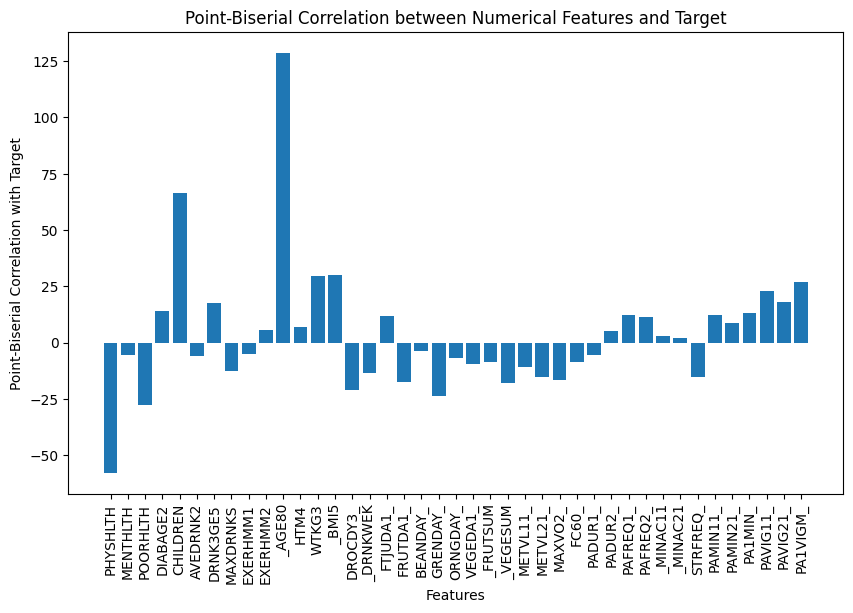

In [11]:
# Check point biserial correlation between features and target
pb_correlation = point_biserial_correlation(x_train, y_train, feature_dict, display_plot=True)